##                  **Business Problem Statement**
Given business problem belongs **Small Basket** which is a huge online / mobile application based grocery retailer in India. Now Small Basket is trying to manage its supply chain and delivery partners and would like to accurately forecast the sales for the period starting from 1st January 2019 to 15th January 2019 . To forecast following data was given.
# Given Data 
1.Train data:Consists of unit sales for particular item,location and with respect to dates.

2.Item details:This gives the insight of particular item belonging to which class and category.

3.Transactions details:The gives the insight of number of transactions per location and date.

4.Location details:This gives us location belongs to which state and city.

5.Test data: This is similar to train data which has details of 2019 first 15 days which is to be predicted.

## Evaluation metric: MAPE

### The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. 


## MAPE= 1/n summation(|actual|-|forecast|)/|actual|)*100








In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
## squarify library is for plotting graph in sqaure space
pip install squarify

In [6]:
## pandasql library is for writing sql queries in python
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=9a09984a5714e0e7f117d8c327c4f4b6bf7ac46350acc270f2e62019f3378ad4
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
## required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pickle
import plotly.graph_objs as go
import plotly.offline as py
import pandasql as ps
import warnings
warnings.filterwarnings("ignore")

In [0]:
## changing the path directory
os.chdir('/content/drive/My Drive/PHD')

In [9]:
## get the present working directory
os.getcwd()

'/content/drive/My Drive/PHD'

In [10]:
## shows list of items present in working directory
ls

 catboost_info/        'PHD(14-02-20) .ipynb'   train_15.pickle
 dec1.csv               sample_submission.csv   train_17_18.pickle
 dec.csv                sub1.csv                Train_1.pickle
 final_test.pickle      sub2.csv                train_2yrs_out.csv
 item_details.csv       test_17_18.pickle       train4.csv
 items.pickle           Test_1.pickle           train_4yrs.csv
 lgb.csv                test_2yrs_out.csv       train.csv
 location_details.csv   test4.csv               train.pickle
 location.pickle        test_4yrs.csv           train_transactions.csv
 lrr.csv                test.csv                trans.pickle
'PHD(13-02-20).ipynb'   test.pickle             xgb.csv


In [0]:
## load the location details data
data_location= pd.read_csv('location_details.csv')

In [0]:
## to see the first 5 rows of the data
data_location.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [0]:
## changing the dtypes in the data for memory optimization
data_location['location_id']= data_location['location_id'].astype('category')
data_location['city']= data_location['city'].astype('category')
data_location['state']= data_location['state'].astype('category')
data_location['type']= data_location['type'].astype('category')
data_location['cluster']= data_location['cluster'].astype('int8')

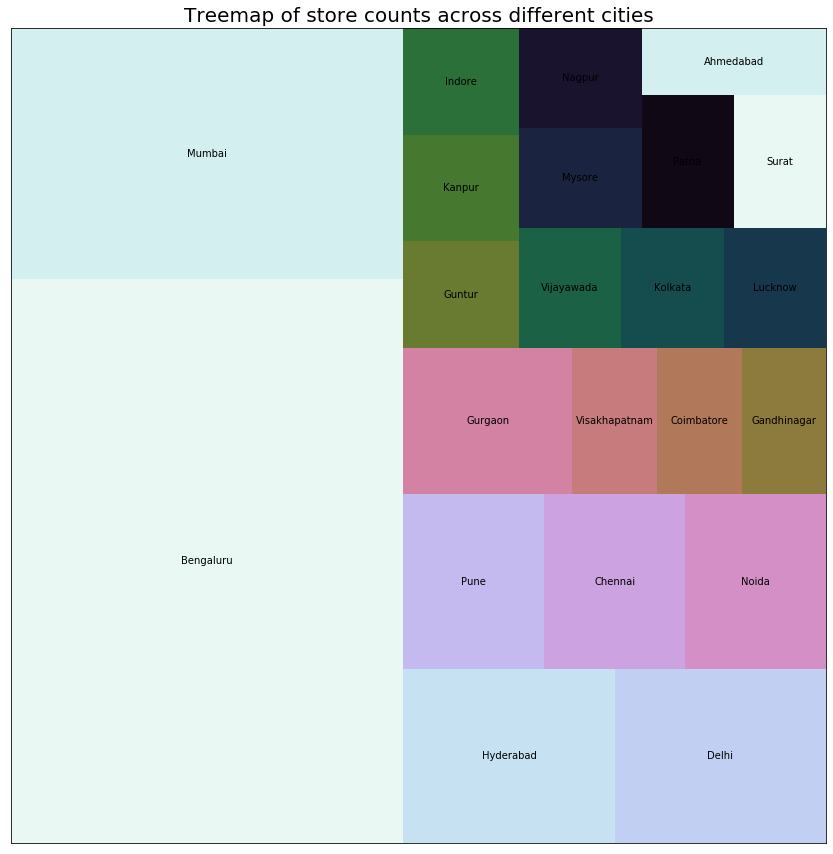

In [0]:
## treemap to show store counts in each city

fig = plt.figure(figsize=(10,8))
marrimeko=data_location.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['city'].values,label=marrimeko.index,color=sns.color_palette('cubehelix_r', 20),alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.title("Treemap of store counts across different cities", fontsize=20)
plt.show();

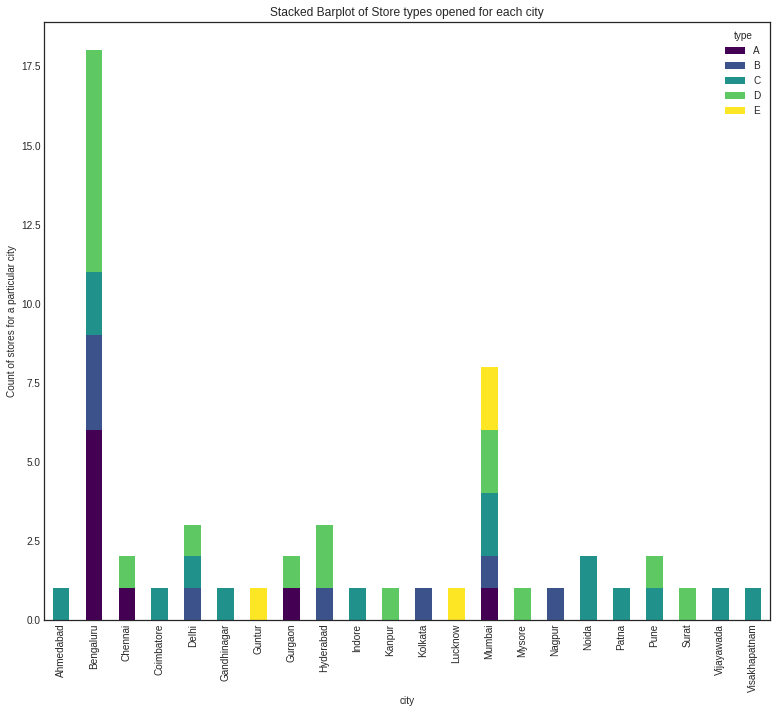

In [0]:
## stackbar to see count of stores and city with respect to type of business unit

plt.style.use('seaborn-white')
city_cluster = data_location.groupby(['city','type']).location_id.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

In [0]:
## loaded the items data

data_item= pd.read_csv('item_details.csv')

In [0]:
data_item.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [0]:
data_item['item_id']= data_item['item_id'].astype('category')
data_item['category_of_item']= data_item['category_of_item'].astype('category')
data_item['class']= data_item['class'].astype('category')
data_item['perishable']= data_item['perishable'].astype('int8')

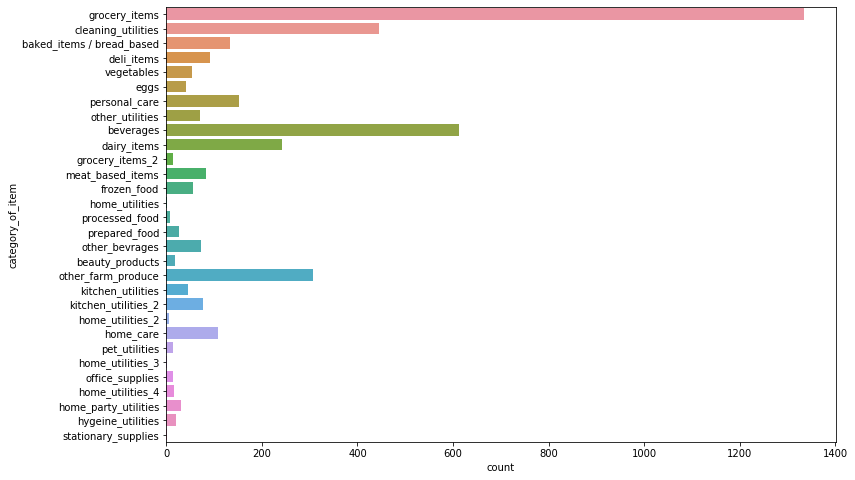

In [0]:
## bargraph for count of items in each category of items

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.countplot(y = "category_of_item", data = data_item)

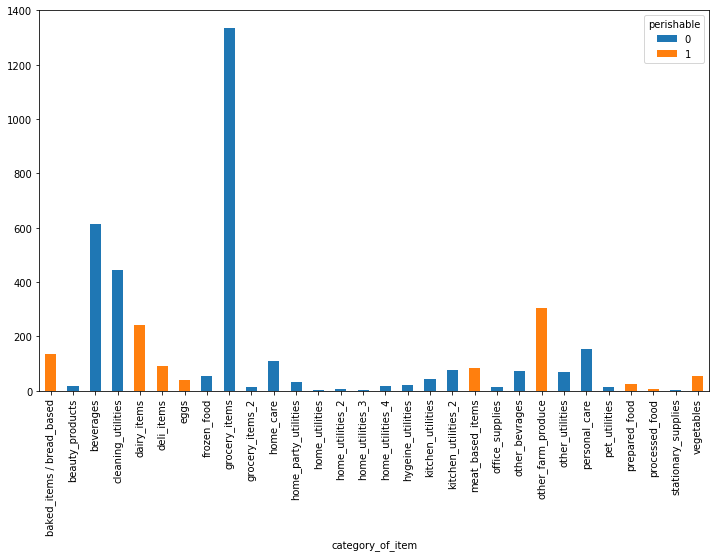

In [0]:
ct = pd.crosstab(data_item.category_of_item, data_item.perishable)
ct.plot.bar(figsize = (12, 7), stacked=True)
plt.legend(title='perishable')
plt.show()

In [0]:
## loaded the transactions data

data_trans= pd.read_csv('train_transactions.csv')

In [0]:
data_trans.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [0]:
data_trans['date']= pd.to_datetime(data_trans['date'],format = "%Y-%m-%d")
data_trans['location_identifier']= data_trans['location_identifier'].astype('category')
data_trans['transactions']= data_trans['transactions'].astype('int16')

In [0]:
data_trans['location_identifier']=data_trans['location_identifier'].apply(lambda x: x.strip('location_'))

In [0]:
data_trans['year']=data_trans['date'].dt.year

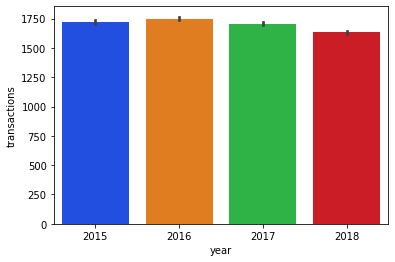

In [0]:
sns.barplot(x=data_trans['year'],y=data_trans['transactions'],palette='bright')       ## plot to check which year has high sales for first 15 days.

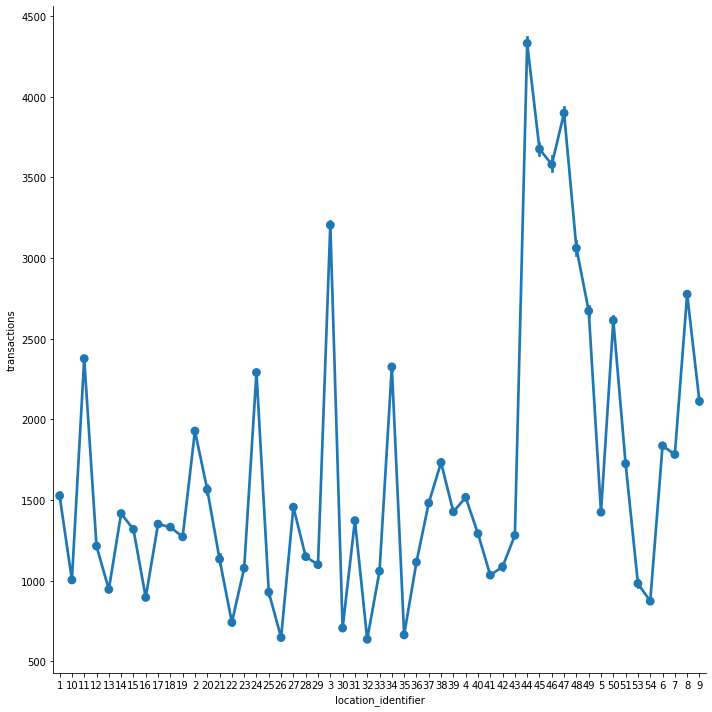

In [0]:
## plot to explore the transactions for different locations with respect to 4 years

g = sns.factorplot(x="location_identifier", y="transactions", height = 10, data=data_trans)


In [0]:
## seeing total transactions with respect to date by writing sql query

q1 = """SELECT date,sum(transactions) as tot_trans FROM data_trans GROUP BY date"""

trans1= pd.DataFrame(ps.sqldf(q1, locals()))

In [0]:
trans1.head()

,date,tot_trans
0,2015-01-01 00:00:00.000000,770
1,2015-01-02 00:00:00.000000,93215
2,2015-01-03 00:00:00.000000,78504
3,2015-01-04 00:00:00.000000,78494
4,2015-01-05 00:00:00.000000,93573


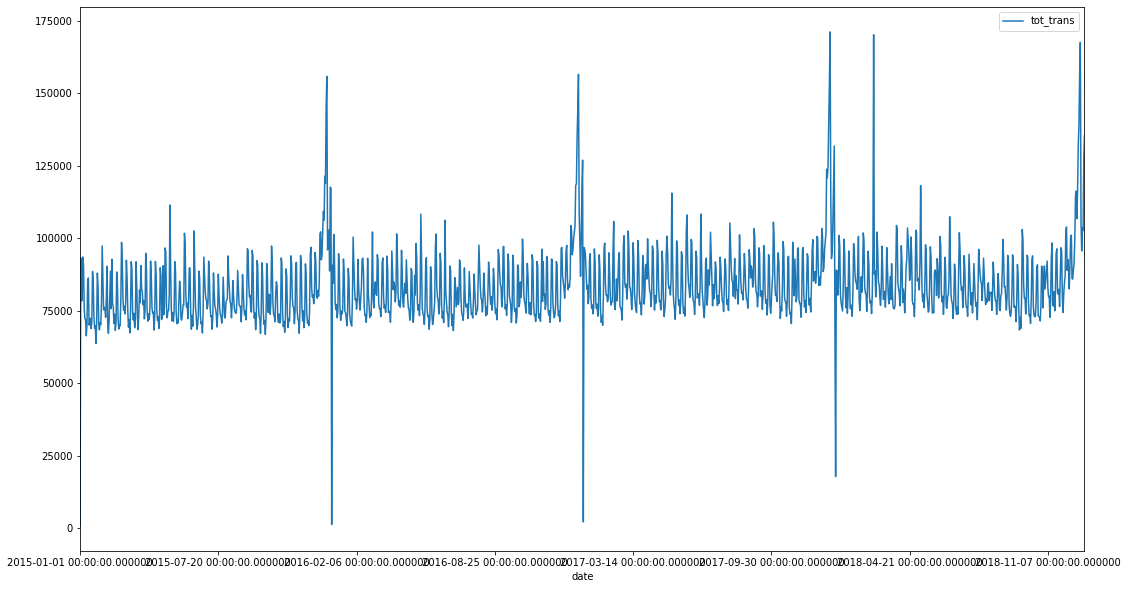

In [0]:
## line graph with repect to date and sum of transactions

trans1.plot(kind='line',x='date',y='tot_trans',figsize=(18,10))

In [0]:
## loaded the train data

data_train= pd.read_csv('train.csv')

In [0]:
data_train.head()         ## to check the first five records of the data

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [0]:
### changing the dtypes of train data

data_train['date']=pd.to_datetime(data_train['date'],format = "%Y-%m-%d" )
data_train['item_id']=data_train['item_id'].astype('category')
data_train['locationId']= data_train['locationId'].astype('category')
data_train['unit_sales']= data_train['unit_sales'].astype('float64')
data_train['onpromotion']=data_train['onpromotion'].astype('category')

In [0]:
## to see the memory usage of each data

print(data_train.memory_usage(deep=True))
print('\n')
print(data_trans.memory_usage(deep=True))
print('\n')
print(data_location.memory_usage(deep=True))
print('\n')
print(data_item.memory_usage(deep=True))

Index                128
date           813510232
locationId     101694934
item_id        203808427
unit_sales     203377558
onpromotion    101688927
dtype: int64


Index                     128
date                   571128
location_identifier     77546
transactions           142782
dtype: int64


Index           128
location_id    6277
city           2107
state          1558
type            544
cluster          54
dtype: int64


Index                  128
item_id             453556
category_of_item      7525
class                41019
perishable            4100
dtype: int64


In [0]:
## value counts for onpromotion in train data

data_train.onpromotion.value_counts()

False    74970155
True      5060973
Name: onpromotion, dtype: int64

In [0]:
## NaN's in the onpromotions

data_train.onpromotion.isnull().sum()

21657651

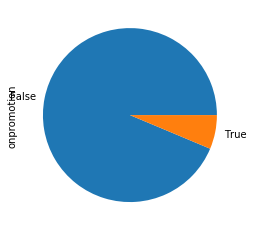

In [0]:
data_train["onpromotion"].value_counts().plot(kind='pie')

In [0]:
## detailed view of the train data

data_train.describe(include="all")

,date,locationId,item_id,unit_sales,onpromotion
count,101688779,101688779,101688779,1.016888e+08,80031128
unique,1456,53,3890,NaN,2
top,2018-02-28 00:00:00,location_44,item_314384,NaN,False
freq,193430,2878119,71407,NaN,74970155
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2018-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.647890e+00,NaN
std,NaN,NaN,NaN,2.349533e+01,NaN
min,NaN,NaN,NaN,-1.537200e+04,NaN
25%,NaN,NaN,NaN,2.000000e+00,NaN


In [0]:
data_item.describe(include='all')


,item_id,category_of_item,class,perishable
count,4100,4100,4100,4100.000000
unique,4100,30,337,NaN
top,item_999547,grocery_items,class_1016,NaN
freq,1,1334,133,NaN
mean,NaN,NaN,NaN,0.240488
std,NaN,NaN,NaN,0.427432
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


In [0]:
data_location.describe(include='all')


,location_id,city,state,type,cluster
count,54,54,54,54,54.000000
unique,54,22,13,5,NaN
top,location_9,Bengaluru,Karnataka,D,NaN
freq,1,18,19,18,NaN
mean,NaN,NaN,NaN,NaN,8.481481
std,NaN,NaN,NaN,NaN,4.693395
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,8.500000
75%,NaN,NaN,NaN,NaN,13.000000


In [0]:
data_trans.describe(include='all')

,date,location_identifier,transactions
count,71391,71391,71391.000000
unique,1454,53,NaN
top,2018-02-28 00:00:00,33,NaN
freq,106,1452,NaN
first,2015-01-01 00:00:00,NaN,NaN
last,2018-12-31 00:00:00,NaN,NaN
mean,NaN,NaN,1701.598367
std,NaN,NaN,968.125835
min,NaN,NaN,5.000000
25%,NaN,NaN,1049.000000


In [0]:
## to check the duplicate values present the train data

data_train[data_train.duplicated()]

,date,locationId,item_id,unit_sales,onpromotion
71921607,2018-02-28,location_1,item_105737,1.0,False
71921619,2018-02-28,location_1,item_114778,2.0,False
71921627,2018-02-28,location_1,item_115891,1.0,False
71921628,2018-02-28,location_1,item_115892,1.0,False
71921638,2018-02-28,location_1,item_119624,3.0,True
...,...,...,...,...,...
72015712,2018-02-28,location_54,item_2010743,7.0,False
72015722,2018-02-28,location_54,item_2011110,1.0,False
72015725,2018-02-28,location_54,item_2011200,1.0,False
72015727,2018-02-28,location_54,item_2011218,2.0,False


In [0]:
## dropping the duplicate rows present in the train data

data_train=data_train.drop_duplicates()

In [0]:
data_train.shape

(101678735, 5)

In [0]:
## renaming the column names

data_location=data_location.rename(columns={'location_id':'locationId'})

In [0]:
data_trans=data_trans.rename(columns={'location_identifier':'locationId'})

In [0]:
## to check missing location in the train data

train_uni=data_train.locationId.unique()
location_uni= data_location.locationId.unique()
set(location_uni)-set(train_uni)

{'location_52'}

 ### location 52 is missing in the train data but given in location data so,it can be a warehouse type where is stock is stored

In [0]:
data_location[(data_location['locationId']=='location_52')].head()      

,locationId,city,state,type,cluster
51,location_52,Chennai,Tamil Nadu,A,11


In [0]:
## to check the missing items in the train data

train_items=data_train.item_id.unique()
item_items= data_item.item_id.unique()
set(item_items)-set(train_items)

{'item_1464607',
 'item_1467088',
 'item_1467093',
 'item_1921118',
 'item_2011437',
 'item_2011448',
 'item_2011450',
 'item_2011451',
 'item_2011457',
 'item_2011459',
 'item_2011468',
 'item_2011470',
 'item_2011471',
 'item_2015646',
 'item_2015898',
 'item_2027559',
 'item_2033554',
 'item_2035576',
 'item_2042614',
 'item_2043261',
 'item_2043559',
 'item_2043795',
 'item_2043849',
 'item_2045162',
 'item_2045545',
 'item_2046260',
 'item_2046805',
 'item_2046903',
 'item_2046916',
 'item_2047495',
 'item_2047496',
 'item_2047506',
 'item_2047508',
 'item_2047752',
 'item_2048164',
 'item_2048358',
 'item_2048399',
 'item_2048546',
 'item_2048596',
 'item_2048954',
 'item_2049003',
 'item_2049026',
 'item_2049081',
 'item_2049304',
 'item_2049778',
 'item_2051064',
 'item_2052563',
 'item_2053415',
 'item_2053564',
 'item_2053590',
 'item_2053610',
 'item_2053614',
 'item_2053630',
 'item_2053751',
 'item_2053874',
 'item_2054300',
 'item_2054580',
 'item_2054605',
 'item_2054635

### There are 221 items where is no unit sales for these items. As a suggestion that small basket can mention low investments of these items.

In [0]:
## to check which date has no transactions in the train data

train_date=data_train.date.unique()
trans_date= data_trans.date.unique()
set(train_date)-set(trans_date)

{numpy.datetime64('2018-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-01-03T00:00:00.000000000')}

### The above two days has no transactions so these can be ignored.

In [0]:
## inspect data is function to check the dtypes,levels and NaN's in the data

def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x:str(x.unique()),axis=0), 
                         "NaN":round(data.isnull().sum(),1),
                         "NaN%":round(data.isnull().sum()/100,1)})

In [0]:
inspect_data(data_train)

,Data Type,No of Levels,Levels,NaN,NaN%
date,datetime64[ns],1456,['2015-01-01T00:00:00.000000000' '2015-01-02T0...,0,0.0
locationId,category,53,"[location_25, location_1, location_2, location...",0,0.0
item_id,category,3890,"[item_103665, item_105574, item_105575, item_1...",0,0.0
unit_sales,float64,244090,[ 7. 1. 2. ... 279.395 145.603 1...,0,0.0
onpromotion,category,2,"[NaN, False, True]\nCategories (2, object): [F...",21657651,216576.5


In [0]:
inspect_data(data_trans)

,Data Type,No of Levels,Levels,NaN,NaN%
date,datetime64[ns],1454,['2015-01-01T00:00:00.000000000' '2015-01-02T0...,0,0.0
locationId,category,53,"[25, 1, 2, 3, 4, ..., 20, 29, 21, 42, 22]\nLen...",0,0.0
transactions,int16,4912,[ 770 2111 2358 ... 5598 5304 5259],0,0.0


In [0]:
inspect_data(data_item)

,Data Type,No of Levels,Levels,NaN,NaN%
item_id,category,4100,"[item_96995, item_99197, item_103501, item_103...",0,0.0
category_of_item,category,30,"[grocery_items, cleaning_utilities, baked_item...",0,0.0
class,category,337,"[class_1093, class_1067, class_3008, class_102...",0,0.0
perishable,int8,2,[0 1],0,0.0


In [0]:
inspect_data(data_location)

,Data Type,No of Levels,Levels,NaN,NaN%
locationId,category,54,"[location_1, location_2, location_3, location_...",0,0.0
city,category,22,"[Bengaluru, Delhi, Kolkata, Noida, Vijayawada,...",0,0.0
state,category,13,"[Karnataka, NCR, West Bengal, Uttar Pradesh, C...",0,0.0
type,category,5,"[D, B, C, E, A]\nCategories (5, object): [D, B...",0,0.0
cluster,int8,17,[13 8 9 4 6 15 7 3 12 16 1 10 2 5 11 ...,0,0.0


In [0]:
## merging the train data with item data with item id 

data= pd.merge(data_train,data_item,how='inner',on='item_id')

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2015-01-01 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1
1,2015-01-02 00:01:00,location_1,item_103665,2.0,False,baked_items / bread_based,class_2712,1
2,2015-01-02 00:01:00,location_2,item_103665,5.0,False,baked_items / bread_based,class_2712,1
3,2015-01-02 00:01:00,location_3,item_103665,6.0,False,baked_items / bread_based,class_2712,1
4,2015-01-02 00:01:00,location_4,item_103665,2.0,False,baked_items / bread_based,class_2712,1


In [0]:
data.shape

(101678735, 8)

In [0]:
## merging the train data with location data using location id

data= pd.merge(data,data_location,how='inner',on=['locationId'])

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2015-01-01 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
1,2015-01-02 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
2,2015-01-04 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
3,2015-01-05 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
4,2015-01-06 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1


In [0]:
data.shape

(101678735, 12)

### extracting the day,week,month and year from date in train data

In [0]:
data['month']= data['date'].dt.month

In [0]:
data['day']=data['date'].dt.day

In [0]:
data['year']=data['date'].dt.year

In [0]:
data.head()


,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day,year,week
0,2015-01-01 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,1,2015,1
1,2015-01-02 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,2,2015,1
2,2015-01-04 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,4,2015,1
3,2015-01-05 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,5,2015,2
4,2015-01-06 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,6,2015,2


In [0]:
## pickling the data which is used retain the last worked data 

pickle_out= open('merge.pickle','wb')
pickle.dump(data,pickle_out)
pickle_out.close()

In [0]:
## loaded the pickle data

pickle_in= open('merge.pickle','rb')
data= pickle.load(pickle_in)

### subsetting the first 15 days of years data from the whole data as the predictions should been shown to the required 15 days of the data

In [0]:
data_imp= data.loc[(data['month']==1)&(data['day']<=15),:]

In [0]:
data_imp.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day,year,week
0,2015-01-01 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,1,2015,1
1,2015-01-02 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,2,2015,1
2,2015-01-04 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,4,2015,1
3,2015-01-05 00:01:00,location_25,item_103665,5.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,5,2015,2
4,2015-01-06 00:01:00,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,6,2015,2


In [0]:
## pickled data of first 15 days of all years in the merged data

pickle_out= open('first_15.pickle','wb')
pickle.dump(data_imp,pickle_out)
pickle_out.close()

In [0]:
pickle_in= open('first_15.pickle','rb')
data_imp= pickle.load(pickle_in)


## Business insights of items and clusters from 2015 to 2018

In [0]:
data_imp['week']=data_imp['date'].dt.week

In [0]:
data_imp.head()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year,city,state,type,cluster,week
0,2015-01-01,location_25,item_103665,7.0,False,1,1,2015,Kanpur,Uttar Pradesh,D,1,1
1,2015-01-01,location_25,item_105574,1.0,False,1,1,2015,Kanpur,Uttar Pradesh,D,1,1
2,2015-01-01,location_25,item_105575,2.0,False,1,1,2015,Kanpur,Uttar Pradesh,D,1,1
3,2015-01-01,location_25,item_108079,1.0,False,1,1,2015,Kanpur,Uttar Pradesh,D,1,1
4,2015-01-01,location_25,item_108701,1.0,False,1,1,2015,Kanpur,Uttar Pradesh,D,1,1


## subsetting the cluster and unit sales from the first 15 days data

In [0]:
data1= data_imp.loc[:,['cluster','unit_sales']]

In [0]:
data1.shape

(3614582, 2)

In [0]:
## converting to total sales from the subset data with respect to cluster and converting it data frame

q1 = """SELECT cluster,sum(unit_sales) as tot_sales FROM data1 GROUP BY cluster"""

df1= pd.DataFrame(ps.sqldf(q1, locals()))

In [0]:
df1.head(20).sort_values('tot_sales',ascending=False)

,cluster,tot_sales
13,14,5.292238e+06
7,8,3.503461e+06
5,6,3.269585e+06
10,11,3.112135e+06
9,10,2.380939e+06
2,3,2.291174e+06
12,13,2.171348e+06
4,5,2.036079e+06
14,15,1.801046e+06
0,1,1.756875e+06


<Figure size 1008x1152 with 0 Axes>

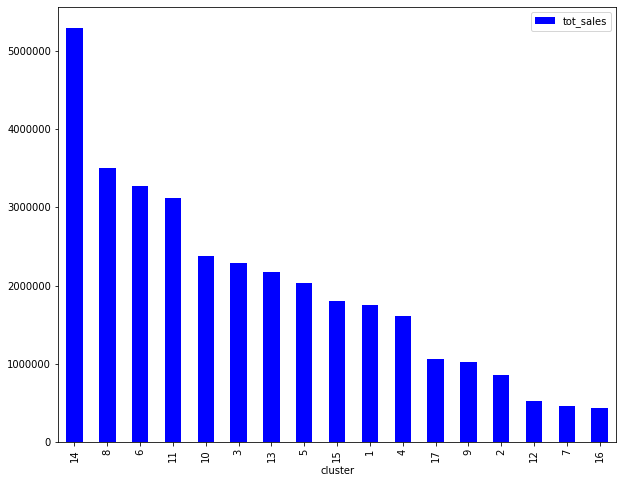

In [0]:
## bar graph to see highest unit sales with respect to cluster

plt.figure(figsize=(14,16))
df1.sort_values('tot_sales',ascending=False,inplace=True)
df1.plot(kind='bar',y='tot_sales',x='cluster',color='b',figsize=(10,8))



### cluster 14 has highest unit sales in the data, where cluster 14 is related to BENGULURU region.
 

## Now subset the itemid,unit sales and cluster equal to 14 to check the top selling items in this cluster with respect to all four years data.

In [0]:
data2= data_imp.loc[data_imp['cluster']==14,['cluster','item_id','unit_sales']]

In [0]:
data2.head()

,cluster,item_id,unit_sales
76231657,14,item_103665,7.0
76231658,14,item_105574,27.0
76231659,14,item_105575,60.0
76231660,14,item_105577,23.0
76231661,14,item_105693,2.0


In [0]:
## calculating the sum of unit sales of cluster 14 with respect to items to know the top selling items

q2 = """SELECT cluster,item_id,sum(unit_sales) as tot_sales FROM data2 GROUP BY item_id"""

df2= pd.DataFrame(ps.sqldf(q2, locals()))

In [0]:
## sorting the top 10 selling items in cluster 14

item_10=df2.sort_values('tot_sales',ascending=False).head(10)

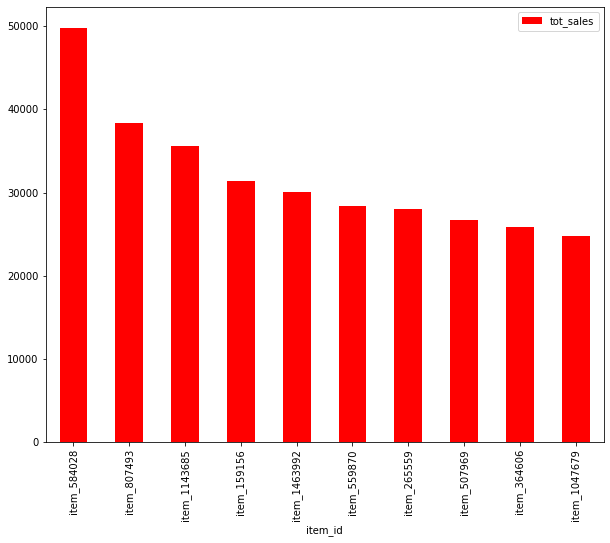

In [0]:
## plot for top 10 selling items in cluster 14

item_10.plot(kind='bar',x='item_id',y='tot_sales',color='r',figsize=(10,8))

### This is subsetting is to calculate the rate of purchase per week of the above items.

In [0]:

data3= data_imp.loc[(data_imp['cluster']==14) & (data_imp['week']==2),['week','item_id','unit_sales']]

In [0]:
data3.week.value_counts()

2    178860
Name: week, dtype: int64

In [0]:
## calculating the rate of purchase by grouping the week and item_id 

q3 = """SELECT week,item_id,sum(unit_sales)/2 as avg_sales FROM data3 GROUP BY week,item_id"""

df3= pd.DataFrame(ps.sqldf(q3, locals()))

In [0]:
df3.week.value_counts()

2    3081
Name: week, dtype: int64

In [0]:
## sorting the top 10 items rate of purchase

item_10_rate=df3.sort_values('avg_sales',ascending=False).head(10)

Text(0.5, 0, 'week')

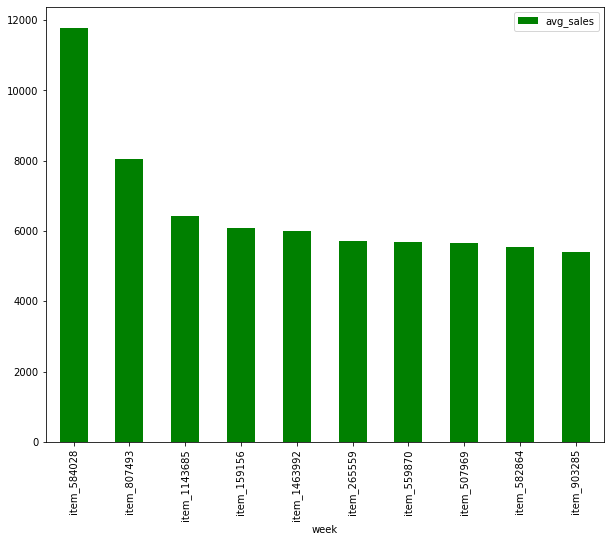

In [0]:
item_10_rate.plot(kind='bar',x='item_id',y='avg_sales',color='g',figsize=(10,8))
plt.xlabel('week')

### PREPROCESSING

In [0]:
train= pd.read_csv('train.csv')   ## considering the main data 

In [0]:
train['date']=pd.to_datetime(train['date'],format = '%Y-%m-%d')            ## changing the date to date-time format
# train['item_id']=train['item_id'].astype('category')
# train['locationId']= train['locationId'].astype('category')
# train['unit_sales']= train['unit_sales'].astype('float64')
# train['onpromotion']=train['onpromotion'].astype('category')

In [0]:
train_15 = train[(train['date'] >= '2015-01-01') & (train['date'] <= '2015-01-15')         ## subsetting the first 15 days of january month in all 4 yrs.
                   | (train['date'] >= '2016-01-01') & (train['date'] <= '2016-01-15')
                  | (train['date'] >= '2017-01-01') & (train['date'] <= '2017-01-15') 
                   | (train['date'] >= '2018-01-01') & (train['date'] <= '2018-01-15')]

In [0]:
train_15.shape         ## checking the shape of subsetted data

(3614828, 5)

In [0]:
train_15.head()     ## first 5 records of the data

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [0]:
train_15['locationId']=train_15['locationId'].apply(lambda x: x.strip('location_'))    ## removing the string part from location and item column
train_15['item_id']= train_15['item_id'].apply(lambda x: x.strip('item_'))

In [0]:
train_15['day']= train_15['date'].dt.day                   ## extracting day,month,year from the date as feature engineering step.
train_15['month']= train_15['date'].dt.month
train_15['year']=train_15['date'].dt.year

In [0]:
train_15.head()     ## data after feature engineering the date column

,date,locationId,item_id,unit_sales,onpromotion,day,month,year
0,2015-01-01,25,103665,7.0,NaN,1,1,2015
1,2015-01-01,25,105574,1.0,NaN,1,1,2015
2,2015-01-01,25,105575,2.0,NaN,1,1,2015
3,2015-01-01,25,108079,1.0,NaN,1,1,2015
4,2015-01-01,25,108701,1.0,NaN,1,1,2015


In [0]:
true = train_15[train_15['onpromotion'] == True].sort_values(by = ['date']).reset_index()  ## sorting out the promotions present in 4 yrs data

In [0]:
false = train_15[train_15['onpromotion'] == False].sort_values(by = ['date']).reset_index() ## sorting out 4 yrs data which has no promotions

In [0]:
set(false['date'].dt.year)      ## to check which year has false in onpromotion column

{2017, 2018}

In [0]:
set(true['date'].dt.year)      ## to check which year has true in onpromotion column

{2017, 2018}

In [0]:
train_17_18= train_15[(train['date'] >= '2017-01-01') & (train['date'] <= '2017-01-15')       ## so, now considering the first 15 days of 2017 and 2018 data which is sufficient for my predictions.
                   | (train['date'] >= '2018-01-01') & (train['date'] <= '2018-01-15')]

In [0]:
train_17_18.head()   ## after subsetting the data the first five records of it

,date,locationId,item_id,unit_sales,onpromotion,day,month,year
38594264,2017-01-01,25,103665,12.0,False,1,1,2017
38594265,2017-01-01,25,105575,23.0,False,1,1,2017
38594266,2017-01-01,25,108634,1.0,False,1,1,2017
38594267,2017-01-01,25,108698,6.0,False,1,1,2017
38594268,2017-01-01,25,108786,6.0,False,1,1,2017


In [0]:
pickle_out= open('train_17_18.pickle','wb')                ## pickle to save the data in a file
pickle.dump(train_data,pickle_out)
pickle_out.close()

In [0]:
pickle_in= open('train_17_18.pickle','rb')          ## read the pickle file to work on previously saved file.
train_data= pickle.load(pickle_in)

In [0]:
pickle_in= open('/content/drive/My Drive/PHD/location.pickle','rb')    ## read the pickle file to work on previously saved file.
location_data= pickle.load(pickle_in)

In [0]:
pickle_in= open('/content/drive/My Drive/PHD/test.pickle','rb')    ## read the pickle file to work on previously saved file.
test_data= pickle.load(pickle_in)

In [0]:
train_data.head()     ## read the first five records of data

,date,locationId,item_id,unit_sales,onpromotion,day,month,year
38594264,2017-01-01,25,103665,12.0,False,1,1,2017
38594265,2017-01-01,25,105575,23.0,False,1,1,2017
38594266,2017-01-01,25,108634,1.0,False,1,1,2017
38594267,2017-01-01,25,108698,6.0,False,1,1,2017
38594268,2017-01-01,25,108786,6.0,False,1,1,2017


In [0]:
test_data.head()          ## read the first five records of test data

,id,date,locationId,item_id,onpromotion,day,month,year
0,0,2019-01-01,25,99197,False,1,1,2019
1,1,2019-01-01,25,103665,False,1,1,2019
2,2,2019-01-01,25,105574,False,1,1,2019
3,3,2019-01-01,25,105857,False,1,1,2019
4,4,2019-01-01,25,106716,False,1,1,2019


In [0]:
location_data.head()    ## read the first five records of location data

,locationId,city,state,type,cluster
0,1,Bengaluru,Karnataka,D,13
1,2,Bengaluru,Karnataka,D,13
2,3,Bengaluru,Karnataka,D,8
3,4,Bengaluru,Karnataka,D,9
4,5,Delhi,NCR,D,4


In [0]:
train= train_data.merge(location_data,how='inner',on='locationId')        ## merging the location details to train data for infering from the cluster and type of business units.

In [0]:
test= test_data.merge(location_data,how='inner',on='locationId')          ## merging the location details to test data for infering from the cluster and business type.

In [0]:
train.head()      ## after merging the data read the first five records of train data

,date,locationId,item_id,unit_sales,onpromotion,day,month,year,city,state,type,cluster
0,2017-01-01,25,103665,12.0,False,1,1,2017,Kanpur,Uttar Pradesh,D,1
1,2017-01-01,25,105575,23.0,False,1,1,2017,Kanpur,Uttar Pradesh,D,1
2,2017-01-01,25,108634,1.0,False,1,1,2017,Kanpur,Uttar Pradesh,D,1
3,2017-01-01,25,108698,6.0,False,1,1,2017,Kanpur,Uttar Pradesh,D,1
4,2017-01-01,25,108786,6.0,False,1,1,2017,Kanpur,Uttar Pradesh,D,1


In [0]:
test.head()         ## after merging the data read the first five records of test data

,id,date,locationId,item_id,onpromotion,day,month,year,city,state,type,cluster
0,0,2019-01-01,25,99197,False,1,1,2019,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,25,103665,False,1,1,2019,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,25,105574,False,1,1,2019,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,25,105857,False,1,1,2019,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,25,106716,False,1,1,2019,Kanpur,Uttar Pradesh,D,1


In [0]:
train= train.drop(['date','city','state','type'],axis=1)      ## drop the unnecessary columns from the train data

In [0]:
test= test.drop(['date','city','state','type','id'],axis=1)     ## drop the unnecessary columns from the test data

In [0]:
train.head()      ## after dropping the columns train data

,locationId,item_id,unit_sales,onpromotion,day,month,year,cluster
0,25,103665,12.0,False,1,1,2017,1
1,25,105575,23.0,False,1,1,2017,1
2,25,108634,1.0,False,1,1,2017,1
3,25,108698,6.0,False,1,1,2017,1
4,25,108786,6.0,False,1,1,2017,1


In [0]:
test.head()     ## after dropping the columns test data

,locationId,item_id,onpromotion,day,month,year,cluster
0,25,99197,False,1,1,2019,1
1,25,103665,False,1,1,2019,1
2,25,105574,False,1,1,2019,1
3,25,105857,False,1,1,2019,1
4,25,106716,False,1,1,2019,1


In [0]:
train.dtypes     ## dtypes of train data

locationId       object
item_id        category
unit_sales      float64
onpromotion    category
day               int64
month             int64
year              int64
cluster            int8
dtype: object

In [0]:
test.dtypes        ## dtypes of test data

locationId       object
item_id        category
onpromotion    category
day               int64
month             int64
year              int64
cluster            int8
dtype: object

In [0]:
train.item_id.nunique()       ## number of unique item id's in train data

3443

In [0]:
test.item_id.nunique()      ## number of unique item id's in test data

3828

In [0]:
import numpy as np
def setdiff_sorted(array1,array2,assume_unique=False):               ## function to detect the items that are not present in the train data
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans

In [0]:
train_items=train['item_id'].cat.categories.tolist()       ## creating a list of item id's from train and test data
test_items=test['item_id'].cat.categories.tolist()          

In [0]:
items_not_train= setdiff_sorted(test_items,train_items)    ## sorted item id's by using the above function
print('items',items_not_train)

items ['2027559', '2043795', '2043849', '2045545']


In [0]:
items_labels=train_items+items_not_train      ## adding the item id's which are not present in the train data.

In [0]:
encode= list(range(len(items_labels)))        ## by encoding manually items id's are encoded to train items
dic_items=dict(zip(items_labels,encode))

In [0]:
train['item_id']=train['item_id'].map(dic_items) ## by using map function, mapping the train item id's by dic_items and changing the dtype 
train['item_id']=train['item_id'].astype('int32')

In [0]:
test['item_id']=test['item_id'].map(dic_items)  ## by using the same map function, mapping the test items to dic_items and changing the dtype
test['item_id']=test['item_id'].astype('int32')

In [0]:
train['locationId']=train['locationId'].astype('int8') ## changing the dtypes to int8 of both train and test
test['locationId']=test['locationId'].astype('int8')

In [0]:
train['year']=train['year'].astype('int16')   ## changing the dtypes to int16 of both train and test
test['year']=test['year'].astype('int16')

In [0]:
cat_cols = ['cluster','day','month','onpromotion']   ## differentiate the categorical and numerical columns of train data
num_cols = train.columns.difference(cat_cols)
num_cols

Index(['item_id', 'locationId', 'unit_sales', 'year'], dtype='object')

In [0]:
cat_cols_test=['cluster','day','month','onpromotion']   ## differentiate the categorical and numerical columns of test data
num_cols_test= test.columns.difference(cat_cols_test)
num_cols_test

Index(['item_id', 'locationId', 'year'], dtype='object')

In [0]:
train[cat_cols] = train[cat_cols].apply(lambda x: x.astype('category'))
train.dtypes                                                ## changing the categorical columns to dtype 'category' in train data

locationId         int8
item_id           int32
unit_sales      float64
onpromotion    category
day            category
month          category
year              int16
cluster        category
dtype: object

In [0]:
test[cat_cols_test]=test[cat_cols_test].apply(lambda x: x.astype('category'))
test.dtypes                                         ## changing the categorical columns to dtype 'category' in test data

locationId         int8
item_id           int32
onpromotion    category
day            category
month          category
year              int16
cluster        category
dtype: object

In [0]:
num_data = train.loc[:,num_cols]      ## converting into dataframes for both categorical and numerical in train data
cat_data = train.loc[:,cat_cols]

In [0]:
num_data_test= test.loc[:,num_cols_test]  ## converting into dataframes for both categorical and numerical in test data
cat_data_test= test.loc[:,cat_cols_test]

In [0]:
## using one hot encoding method convert the categorical columns to dummies in train data
cat_data = pd.get_dummies(cat_data,columns=['cluster','day','month','onpromotion'])

In [0]:
## using one hot encoding method convert the categorical columns to dummies in test data
cat_data_test= pd.get_dummies(cat_data_test,columns=['cluster','day','month','onpromotion'])

In [0]:
train = pd.concat([num_data,cat_data],axis=1)      ## merging the num_data and cat_data by using pd.concat for train 

In [0]:
test= pd.concat([num_data_test,cat_data_test],axis=1)   ## merging the num_data and cat_data by using pd.concat for test

In [0]:
pickle_out= open('train_17_18.pickle','wb')     ## pickle to save the data in a file
pickle.dump(train,pickle_out)
pickle_out.close()

In [0]:
pickle_out= open('test_17_18.pickle','wb')      ## pickle to save the data in a file
pickle.dump(test,pickle_out)
pickle_out.close()

In [0]:
pickle_in= open('train_17_18.pickle','rb')         ## read the pickle file to work on previously saved file.
train= pickle.load(pickle_in)

In [0]:
pickle_in= open('test_17_18.pickle','rb')        ## read the pickle file to work on previously saved file.
test= pickle.load(pickle_in)

In [0]:
train.shape   ## check the shape of train

(2140880, 39)

In [0]:
## check the shape of test
test.shape

(1482295, 38)

In [0]:
x = train.drop(["unit_sales"],axis=1)    ## setting to x and y for train features and train target
y = train["unit_sales"]

In [0]:
from sklearn.model_selection import train_test_split      ## using train-test split, splitting the data to train and validation 
x_train,x_validation,y_train,y_validation= train_test_split(x,y,test_size=0.3,random_state=12)

In [15]:
print(x_train.shape)
print(x_validation.shape)    ## after splitting the data, there respestive shapes
print(y_train.shape)
print(y_validation.shape)


(1498616, 38)
(642264, 38)
(1498616,)
(642264,)


## MODEL BULIDING

### LINEAR REGRESSION

In [0]:
from sklearn.linear_model import LinearRegression    ## library for linear regression
lrr = LinearRegression()
lrr.fit(x_train,y_train)        ## fit the train data into the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_train_lrr = lrr.predict(x_train)       ## now predict the target variable with the help of fitted data.
y_pred_valid_lrr = lrr.predict(x_validation)

In [0]:
mape_train_lrr = np.mean(np.abs((y_train- y_pred_train_lrr)/y_train)*100)     ## mape for train data

print(mape_train_lrr)

221.73917849348067


In [0]:
mape_test_lrr = np.mean(np.abs((y_validation- y_pred_valid_lrr)/y_validation)*100)  ## mape for validation data

print(mape_test_lrr)

222.2292092330473


In [0]:
y_pred_test_lrr= lrr.predict(test)           ## predicting on the test data

In [0]:
submission= pd.read_csv('/content/drive/My Drive/PHD/sample_submission.csv')  ## importing sample submission file 

In [0]:
lrr= pd.DataFrame() ## creating a new dataframe for new predicted variable.

In [0]:
lrr['id']=submission['id']
lrr['unit_sales']= y_pred_test_lrr         ## subsetting the id and unit_sales features into new dataframe for submission.

In [0]:
lrr.to_csv('lrr.csv',header=True,index=False)   ## converting into csv for final submission

#### as the data is non linear so, it is not able to predict the target  variable and give the accurate MAPE value. As per the problem it is better to go with tree based models.

### DECISION TREE REGRESSION

In [0]:
from sklearn.tree import DecisionTreeRegressor       ## library for decision tree regression
decision= DecisionTreeRegressor(random_state=143)
decision.fit(x_train,y_train)          ## fit the train data into the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=143, splitter='best')

In [0]:
## now predict the target variable with the help of fitted data.
y_pred_train_dec = decision.predict(x_train)
y_pred_valid_dec = decision.predict(x_validation)

In [0]:
## mape for train data
mape_train = np.mean(np.abs((y_train- y_pred_train_dec)/y_train)*100)

print(mape_train)

0.0


In [0]:
## mape for validation data
mape_test = np.mean(np.abs((y_validation- y_pred_valid_dec)/y_validation)*100)

print(mape_test)

124.11857127385538


#### as we can observe that the data is under fitting so try with different parameters by parameter tuning.

## parameter tuning for decision tree Regressor

In [0]:
decision2= DecisionTreeRegressor(max_depth=5,random_state=143,max_leaf_nodes=10)
decision2.fit(x_train,y_train)   ## fit the train data into the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=143, splitter='best')

In [0]:
## now predict the target variable with the help of fitted data.
y_pred_train_dec2 = decision2.predict(x_train)
y_pred_valid_dec2 = decision2.predict(x_validation)

In [0]:
## mape for train data
mape_train2 = np.mean(np.abs((y_train- y_pred_train_dec2)/y_train)*100)

print(mape_train2)

226.02572420903255


In [0]:
## mape for validation data
mape_test2 = np.mean(np.abs((y_validation- y_pred_valid_dec2)/y_validation)*100)

print(mape_test2)

226.71955899426348


In [0]:
decision3= DecisionTreeRegressor(max_depth=8,random_state=143,max_leaf_nodes=10)
decision3.fit(x_train,y_train)      ## fit the train data into the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=143, splitter='best')

In [0]:
## now predict the target variable with the help of fitted data.
y_pred_train_dec3 = decision3.predict(x_train)
y_pred_valid_dec3 = decision3.predict(x_validation)

In [0]:
## mape for train data
mape_train3 = np.mean(np.abs((y_train- y_pred_train_dec3)/y_train)*100)

print(mape_train3)

227.1566335177893


In [0]:
## mape for validation data
mape_test3 = np.mean(np.abs((y_validation- y_pred_valid_dec3)/y_validation)*100)

print(mape_test3)

227.87097841469125


In [0]:
decision4= DecisionTreeRegressor(max_depth=11,random_state=143,max_leaf_nodes=10)
decision4.fit(x_train,y_train)   ## fit the train data into the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=143, splitter='best')

In [0]:
## now predict the target variable with the help of fitted data.
y_pred_train_dec4 = decision4.predict(x_train)
y_pred_valid_dec4 = decision4.predict(x_validation)

In [0]:
## mape for train data
mape_train4 = np.mean(np.abs((y_train- y_pred_train_dec4)/y_train)*100)

print(mape_train4)

227.1566335177893


In [0]:
## mape for validation data
mape_test4 = np.mean(np.abs((y_validation- y_pred_valid_dec4)/y_validation)*100)

print(mape_test4)

227.87097841469125


In [0]:
decision5= DecisionTreeRegressor(max_depth=11,random_state=143)
decision5.fit(x_train,y_train)   ## fit the train data into the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=143, splitter='best')

In [0]:
## now predict the target variable with the help of fitted data.
y_pred_train_dec5 = decision5.predict(x_train)
y_pred_valid_dec5 = decision5.predict(x_validation)

In [0]:
## mape for train data
mape_train5 = np.mean(np.abs((y_train- y_pred_train_dec5)/y_train)*100)

print(mape_train5)

205.88179538497627


In [0]:
## mape for validation data
mape_test5 = np.mean(np.abs((y_validation- y_pred_valid_dec5)/y_validation)*100)

print(mape_test5)

207.22232745728522


In [0]:
## predicting on the test data
y_pred_test_dec5= decision.predict(test)

In [0]:
## creating a new dataframe for new predicted variable.
decision= pd.DataFrame()

In [0]:
## subsetting the id and unit_sales features into new dataframe for submission.
decision['id']=submission['id']
decision['unit_sales']= y_pred_test_dec5

In [0]:
## converting into csv for final submission
decision.to_csv('dec.csv',header=True,index=False)

#### as decision trees doesn't consider all the features in the data and unable to update the weights and reduce the MAPE. So, boosting techniques helps to update the weights by buliding multiple trees.


### LIGHTGBM

In [0]:
import lightgbm as lgb       ## library for lightgbm regression

d_train = lgb.Dataset(x_train, label= y_train)

In [0]:
params = {}
params['learning_rate']= 0.001       ## parameters for lightgbm
params['boosting_type']='gbdt'
params['objective']='regression'
params['metric']='MAPE'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=15

In [0]:
 ## fit the train data into the model
clf= lgb.train(params, d_train, 100)     

In [0]:
## now predict the target variable with the help of fitted data.
y_pred_lgb_train = clf.predict(x_train)
y_pred_lgb_test= clf.predict(x_validation)


In [0]:
## mape for train data
mape_train_lgb = np.mean(np.abs((y_train- y_pred_lgb_train)/y_train))*100

print(mape_train_lgb)

63.86503067139683


In [0]:
## mape for validation data
mape_test_lgb = np.mean(np.abs((y_validation- y_pred_lgb_test)/y_validation))*100

print(mape_test_lgb)

63.80859439426298


In [0]:
## predicting on the test data
y_pred_lgb_test = clf.predict(test)

In [0]:
## creating a new dataframe for new predicted variable.
clf= pd.DataFrame()

In [0]:
## subsetting the id and unit_sales features into new dataframe for submission.
clf['id']=submission['id']
clf['unit_sales']= y_pred_lgb_test

In [0]:
## converting into csv for final submission
clf.to_csv('lgb.csv',header=True,index=False)

#### lightgbm is same as gradent boosting regression which gave better results but the predictions acquired are not so accurate so further applied xgboost.


### XGBOOST REGRESSION

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [0]:
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)

[07:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_train_xg = xgb_model.predict(x_train)
y_pred_validation_xg= xgb_model.predict(x_validation)

In [0]:
mape_train_xgb = np.mean(np.abs((y_train- y_pred_train_xg)/y_train))*100

print(mape_train_xgb)

211.4731302523308


In [0]:
mape_test_xgb = np.mean(np.abs((y_validation- y_pred_validation_xg)/y_validation))*100

print(mape_test_xgb)

211.9377654812391


## parameter tuning for XGBoost Regressor

In [0]:
xgb_model2=XGBRegressor(n_estimators=150,random_state=143)
xgb_model2.fit(x_train,y_train)

[07:53:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=143,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_train_xg2 = xgb_model2.predict(x_train)
y_pred_validation_xg2= xgb_model2.predict(x_validation)

In [0]:
mape_train_xgb2 = np.mean(np.abs((y_train- y_pred_train_xg2)/y_train))*100

print(mape_train_xgb2)

206.46394663898295


In [0]:
mape_test_xgb2 = np.mean(np.abs((y_validation- y_pred_validation_xg2)/y_validation))*100

print(mape_test_xgb2)

206.88116245606346


In [0]:
xgb_model3=XGBRegressor(n_estimators=150,random_state=143,learning_rate=0.1,max_depth=5)
xgb_model3.fit(x_train,y_train)

[08:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=143,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_train_xg3 = xgb_model3.predict(x_train)
y_pred_validation_xg3= xgb_model3.predict(x_validation)

In [0]:
mape_train_xgb3 = np.mean(np.abs((y_train- y_pred_train_xg3)/y_train))*100

print(mape_train_xgb3)

186.74675051678923


In [0]:
mape_test_xgb3 = np.mean(np.abs((y_validation- y_pred_validation_xg3)/y_validation))*100

print(mape_test_xgb3)

187.35721955008844


In [0]:
xgb_model4=XGBRegressor(n_estimators=150,random_state=143,learning_rate=0.01,max_depth=5)
xgb_model4.fit(x_train,y_train)

[08:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=143,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_train_xg4 = xgb_model4.predict(x_train)
y_pred_validation_xg4= xgb_model4.predict(x_validation)

In [0]:
mape_train_xgb4 = np.mean(np.abs((y_train- y_pred_train_xg4)/y_train))*100

print(mape_train_xgb4)

166.6060894697443


In [0]:
mape_test_xgb4 = np.mean(np.abs((y_validation- y_pred_validation_xg4)/y_validation))*100

print(mape_test_xgb4)

167.08496128717297


In [18]:
xgb_model5=XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.001,random_state=11)
xgb_model5.fit(x_train,y_train)

[11:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=11,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_train_xg5 = xgb_model5.predict(x_train)
y_pred_validation_xg5= xgb_model5.predict(x_validation)

In [20]:
mape_train_xgb5 = np.mean(np.abs((y_train- y_pred_train_xg5)/y_train))*100

print(mape_train_xgb5)

63.1384372325381


In [21]:
mape_test_xgb5 = np.mean(np.abs((y_validation- y_pred_validation_xg5)/y_validation))*100

print(mape_test_xgb5)

63.08400733338717


In [0]:
y_pred_test_xg = xgb_model5.predict(test)

In [0]:
xgb_model= pd.DataFrame()

In [0]:
xgb_model['id']=submission['id']
xgb_model['unit_sales']= y_pred_test_xg

In [0]:
xgb_model.to_csv('xgb.csv',header=True,index=False)

#### solutions for the questions raised by the business intelligence team

In [0]:
pickle_in= open('test.pickle','rb')    ## reading the pickle file of previously saved data
final_test= pickle.load(pickle_in)

In [0]:
pickle_in= open('location.pickle','rb')  ## reading the pickle file of previously saved data
final_location= pickle.load(pickle_in)

In [0]:
final_test= pd.merge(final_test,final_location,how='inner',on='locationId')     ## merging the test data and the location data for breif insights.

In [0]:
final_test['week']=final_test['date'].dt.week       ## extracting week from the final test data

In [27]:
final_test.head()

,id,date,locationId,item_id,onpromotion,day,month,year,city,state,type,cluster,week
0,0,2019-01-01,25,99197,False,1,1,2019,Kanpur,Uttar Pradesh,D,1,1
1,1,2019-01-01,25,103665,False,1,1,2019,Kanpur,Uttar Pradesh,D,1,1
2,2,2019-01-01,25,105574,False,1,1,2019,Kanpur,Uttar Pradesh,D,1,1
3,3,2019-01-01,25,105857,False,1,1,2019,Kanpur,Uttar Pradesh,D,1,1
4,4,2019-01-01,25,106716,False,1,1,2019,Kanpur,Uttar Pradesh,D,1,1


In [0]:
final_test= final_test.drop(['id','date','city','state'],axis=1)    ## dropping the unnecessary columns in the final test data

In [0]:
x= pd.read_csv('xgb.csv')     ## importing the predictions file

In [0]:
final_test['unit_sales']=x['unit_sales']   ## adding a new column for final test data

In [31]:
final_test.head()

,locationId,item_id,onpromotion,day,month,year,type,cluster,week,unit_sales
0,25,99197,False,1,1,2019,D,1,1,1.593629
1,25,103665,False,1,1,2019,D,1,1,1.582322
2,25,105574,False,1,1,2019,D,1,1,1.582322
3,25,105857,False,1,1,2019,D,1,1,1.582322
4,25,106716,False,1,1,2019,D,1,1,1.582322


In [0]:
pickle_out= open('final_test.pickle','wb')
pickle.dump(final_test,pickle_out)            ## pickling the file to save the data
pickle_out.close()

In [0]:
pickle_in= open('final_test.pickle','rb')
final_test= pickle.load(pickle_in)

In [0]:
## converting to total sales from the subset data with respect to cluster and converting it data frame

qt1 = """SELECT cluster,sum(unit_sales) as tot_sales FROM final_test GROUP BY cluster"""

dt1= pd.DataFrame(ps.sqldf(qt1, locals()))

In [35]:
dt1.head(20).sort_values('tot_sales',ascending=False)         ## sorting out values by tot_sales to know which cluster has highest sales.

,cluster,tot_sales
13,14,462057.345701
5,6,346817.333487
7,8,298999.721084
9,10,258595.328995
10,11,250026.272490
2,3,220894.269914
12,13,203304.513169
14,15,173950.011068
3,4,150886.018875
0,1,150585.939752


Text(0.5, 1.0, 'total sales of different clusters')

<Figure size 1008x1152 with 0 Axes>

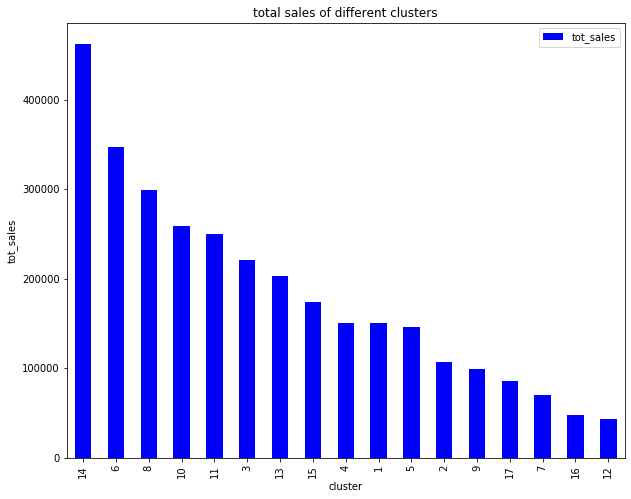

In [37]:
## bar graph to see highest unit sales with respect to cluster

plt.figure(figsize=(14,16))
dt1.sort_values('tot_sales',ascending=False,inplace=True)
dt1.plot(kind='bar',y='tot_sales',x='cluster',color='b',figsize=(10,8))
plt.ylabel('tot_sales')
plt.title('total sales of different clusters')

#### From the above plot we can observe that 14th cluster has highest sales where the 14th cluster belongs to benguluru region and A type business unit.

In [0]:
dat2= final_test.loc[final_test['cluster']==14,['cluster','item_id','unit_sales','type']]   ## observations from 14th cluster

In [39]:
dat2.head(11)

,cluster,item_id,unit_sales,type
1214506,14,99197,3.421239,A
1214507,14,103520,3.324927,A
1214508,14,103665,3.324927,A
1214509,14,105574,3.262104,A
1214510,14,105575,3.262104,A
1214511,14,105577,3.262104,A
1214512,14,105693,3.262104,A
1214513,14,105737,3.262104,A
1214514,14,105857,3.262104,A
1214515,14,106716,3.262104,A


In [0]:
## calculating the sum of unit sales of cluster 14 with respect to items to know the top selling items

qt2 = """SELECT cluster,item_id,sum(unit_sales) as tot_sales FROM final_test GROUP BY item_id"""

dt2= pd.DataFrame(ps.sqldf(qt2, locals()))

In [0]:
## sorting the top 10 selling items in cluster 14

test_item_10=dt2.sort_values('tot_sales',ascending=False).head(10)

Text(0.5, 1.0, 'top 10 selling items in cluster 14')

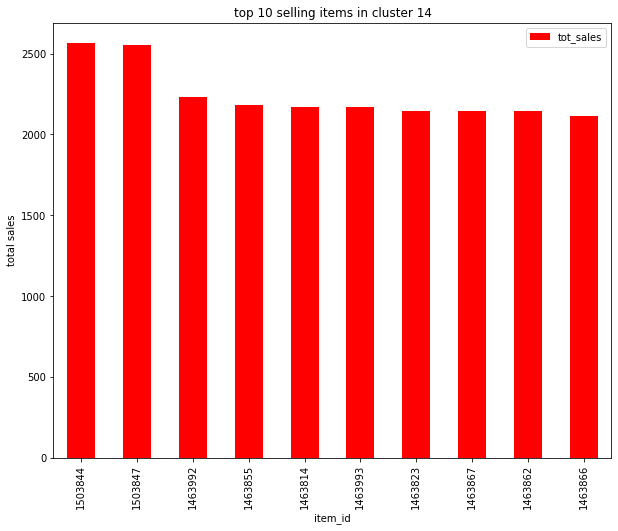

In [44]:
## plot for top 10 selling items in cluster 14

test_item_10.plot(kind='bar',x='item_id',y='tot_sales',color='r',figsize=(10,8))
print('\n')
plt.ylabel('total sales')
plt.title('top 10 selling items in cluster 14')

#### now considering one week data to calculate the rate of sales for these items


In [0]:
## subsetting data from cluster 14 and 2nd week data.
dt3= final_test.loc[(final_test['cluster']==14) & (final_test['week']==2),['week','item_id','unit_sales']]

In [0]:
## calculating the rate of purchase by grouping the week and item_id 

qt3 = """SELECT week,item_id,sum(unit_sales)/2 as avg_sales FROM dt3 GROUP BY week,item_id"""

dt3= pd.DataFrame(ps.sqldf(qt3, locals()))

In [48]:
dt3.week.value_counts()

2    3415
Name: week, dtype: int64

In [0]:
## sorting the top 10 items rate of purchase

test_item_10_rate=dt3.sort_values('avg_sales',ascending=False).head(10)

Text(0.5, 1.0, 'avg sales per week')

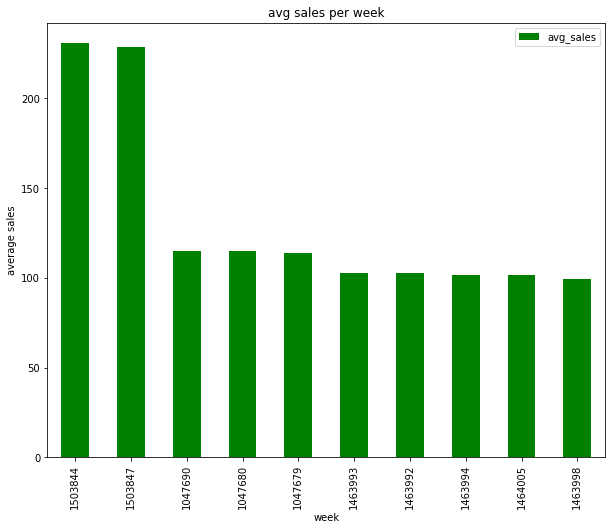

In [50]:
## plot to describe the avg sales per week of the top 10 items.
test_item_10_rate.plot(kind='bar',x='item_id',y='avg_sales',color='g',figsize=(10,8))
plt.xlabel('week')
plt.ylabel('average sales')
plt.title('avg sales per week')

## CONCLUSION

### From the above data I understood that 2 years of data is sufficient for analysis and forecast the sales. As I have done regression analysis I would reduce my MAPE from 253 to 62. If I would have done time series the MAPE value would have reduce some more. so I recommand the business team to maintain sufficient stock of top selling items to overcome the demand.
